In [22]:
import glob
import json
import spacy
import pandas as pd
import random
#from langdetect import detect    #not detecting language correctly
from rouge import Rouge
from summa import summarizer
from sklearn.model_selection import train_test_split
from spacy_langdetect import LanguageDetector
import matplotlib.pyplot as plt

In [197]:
path = '/home/prajakta/Documents/SharpestMinds/COVID-analysis/data/*.json'
files = glob.glob(path)
papers = []
for file in files:
    with open(file) as json_file:
            text = json.load(json_file)
            papers.append([text['paper_id'], text['bodytext'], text['abstract']])
data = pd.DataFrame(papers, columns = ['paper_id', 'bodytext', 'abstract'])
filter = data.abstract != ""
data = data[filter]
#data = data[(data.paper_id != "a6f478369adbfd8be967251a9bb0dd17fa436c45")]
x = data.drop('abstract', axis = 1)
y = data.abstract


In [190]:
data.shape

(8755, 3)

In [153]:
data.loc[data.paper_id == "99e7ae6647b3aef265d79aa84720e5e5b584118d"]

,paper_id,bodytext,abstract,language
469,99e7ae6647b3aef265d79aa84720e5e5b584118d,Cutaneous T cell lymphomas (CTCLs) are a clin...,Background: Although several therapeutic opti...,NaN


In [156]:
data.iloc[0:199]

,paper_id,bodytext,abstract,language
0,17413f651645c2b9c92555e9ce1404b9290eccab,a1111111111 a1111111111 a1111111111 a11111111...,"The cellular serine protease TMPRSS2, a membe...",en
3,ab8c1e32b66b02cd703799df3d2ee37a1cb369b7,Middle East respiratory syndrome coronavirus ...,The persistent public health threat of infect...,en
4,685efeb0ad4c214b8295dc4f723c3269464772d8,Bats have been increasingly associated with e...,We report on the isolation of a novel fusogen...,en
5,09ccb3b9fece55e72c3acb85c4259de62a9c9e0c,Bovine respiratory disease (BRD) incorporates...,Background: The aim of this study was to dete...,en
7,93d080273b1f33330243dd140a35ba890ddd2973,Nurses leaving their jobs or leaving the prof...,Background: Nurses leaving their jobs and the...,en
...,...,...,...,...
464,8a0731d1284b815e6139b1a40a4cc1f3b68dd4f3,Background A significant portion of genomic d...,Background: New technologies are enabling the...,NaN
466,2f5c3733e35cbcc1bb8c2eaded2796d59d94ff2a,Singapore is a hotspot for emerging infectiou...,Singapore is a hotspot for emerging infectiou...,NaN
467,0113b9a8d82039e8474e887038d643853b5fdfeb,Public health surveillance generates informat...,Background: The Ministry of Health and Sanita...,NaN
468,bede1530aa4f5b0fdc57cd2d582bc7e4f153c1e6,transmission to humans is believed to have oc...,Epidemics can spread across large regions bec...,NaN


In [129]:
data.language.sort_values()

0       en
127     en
125     en
122     en
117     en
      ... 
466    NaN
467    NaN
468    NaN
469    NaN
472    NaN
Name: language, Length: 199, dtype: object

Language not detected correctly using Spacy LanguageDetector.

In [182]:
nlp = spacy.load('en')
nlp.add_pipe(LanguageDetector(), name='language_detector', last=True)
language = []
score = []
for i in range(len(data.index)):
    if data.iloc[i].paper_id == "a6f478369adbfd8be967251a9bb0dd17fa436c45":
        print(i)
        nlp_abstract = str(data.iloc[i].abstract)
        language.append(nlp(nlp_abstract)._.language['language'])
        score.append(nlp(nlp_abstract)._.language['score'])
        print(nlp(str(data.iloc[57].abstract))._.language['language'])

#language, score
#data["language"] = pd.Series(language)
#data['language'] = data.nlp_abstract.map(lambda x: x._.language['language'])

57
en


In [173]:
language = []
#nlp_abstract = str(data.iloc[57].abstract)
language.append(nlp(str(data.iloc[57].abstract))._.language['language'])
language

['en']

In [161]:
language.count("vi")

0

In [185]:
text = str(data[data.paper_id == "a6f478369adbfd8be967251a9bb0dd17fa436c45"].abstract)
doc = nlp(text)
print(doc._.language)

{'language': 'vi', 'score': 0.7142816108221657}


In [125]:
data.language.value_counts()

en    81
Name: language, dtype: int64

In [130]:
data[data.paper_id == "a6f478369adbfd8be967251a9bb0dd17fa436c45"]

,paper_id,bodytext,abstract,language


In [136]:
data[data.index == 467]

,paper_id,bodytext,abstract,language
467,0113b9a8d82039e8474e887038d643853b5fdfeb,Public health surveillance generates informat...,Background: The Ministry of Health and Sanita...,NaN


In [191]:
pd.notnull(data).sum(axis = 0)

paper_id    8755
bodytext    8755
abstract    8755
dtype: int64

In [195]:
(data.abstract == "").value_counts()

False    8755
Name: abstract, dtype: int64

In [196]:
(data.bodytext == "").value_counts()

False    8755
Name: bodytext, dtype: int64

In [12]:
a = data['abstract'][data.paper_id == '056b14876b632e0c4f3e75d79ac2d2f77b56fe61']
str(a).count(" ")

4

In [193]:
X_train, Y_train, X_test, Y_test = train_test_split(x, y, test_size = 0.2, random_state= 10)

In [14]:
X_test.describe()

count                                                   159
unique                                                  159
top        Background: Human coronaviruses (HCoVs) are a...
freq                                                      1
Name: abstract, dtype: object

In [15]:
Y_test.describe()

count                                                    40
unique                                                   40
top        Background: Non-pharmaceutical strategies are...
freq                                                      1
Name: abstract, dtype: object

In [16]:
nlp = spacy.load("en_core_web_sm")
doc = nlp(data.bodytext[5])
abstract = data.abstract[5]
sentences = list(doc.sents)
sentence = random.choice(sentences)  
type(str(sentence))

str

In [17]:
evaluator = Rouge()
scores = evaluator.get_scores(str(sentence), abstract)
scores

[{'rouge-1': {'f': 0.0909090891507843,
   'p': 0.4666666666666667,
   'r': 0.050359712230215826},
  'rouge-2': {'f': 0.00653594599662568,
   'p': 0.034482758620689655,
   'r': 0.0036101083032490976},
  'rouge-l': {'f': 0.1304347799533318,
   'p': 0.41379310344827586,
   'r': 0.07741935483870968}}]

In [198]:
data["length_abstract"] = data.abstract.apply(lambda x: str(x).count(" "))
data["length_bodytext"] = data.bodytext.apply(lambda x: str(x).count(" "))

In [201]:
#%%timeit
data["textrank_summary_abstractlength"]=data.apply(lambda x: summarizer.summarize(str(x.bodytext), words = x.length_abstract), axis = 1)
#data["textrank_summary_bodytextlength"]=data.apply(lambda x: summarizer.summarize(str(x.bodytext), words = x.length_bodytext), axis = 1)

data.head()

,paper_id,bodytext,abstract,length_abstract,length_bodytext,textrank_summary_abstractlength
0,17413f651645c2b9c92555e9ce1404b9290eccab,a1111111111 a1111111111 a1111111111 a11111111...,"The cellular serine protease TMPRSS2, a membe...",266,3543,"Moreover, we demonstrate that spread of FLUAV ..."
3,ab8c1e32b66b02cd703799df3d2ee37a1cb369b7,Middle East respiratory syndrome coronavirus ...,The persistent public health threat of infect...,223,4249,The current study determined the effects of a ...
4,685efeb0ad4c214b8295dc4f723c3269464772d8,Bats have been increasingly associated with e...,We report on the isolation of a novel fusogen...,154,4514,Maximum Likelihood trees were prepared using a...
5,09ccb3b9fece55e72c3acb85c4259de62a9c9e0c,Bovine respiratory disease (BRD) incorporates...,Background: The aim of this study was to dete...,274,4392,The objective of this study was to ascertain t...
7,93d080273b1f33330243dd140a35ba890ddd2973,Nurses leaving their jobs or leaving the prof...,Background: Nurses leaving their jobs and the...,297,7159,Exclusion criteria were as follows: Reports fr...


In [212]:
def cal_rougescore(row,metric, measure):
    if row.textrank_summary_abstractlength == "":
        return 0
    else:
        return evaluator.get_scores(str(row.textrank_summary_abstractlength), str(row.abstract))[0][metric][measure]

In [204]:
evaluator = Rouge()
#,data["rouge_2"],data["rouge-l"]  
data["rouge_1"]= data.apply(lambda x: cal_rougescore(x, 'rouge-1'), axis = 1)
data["rouge_2"]= data.apply(lambda x: cal_rougescore(x, 'rouge-2'), axis = 1)
data["rouge_l"]= data.apply(lambda x: cal_rougescore(x, 'rouge-l'), axis = 1)

In [ ]:
evaluator = Rouge()
#,data["rouge_2"],data["rouge-l"]  
data["rouge_1_p"]= data.apply(lambda x: cal_rougescore(x, 'rouge-1', 'p'), axis = 1)
data["rouge_2_p"]= data.apply(lambda x: cal_rougescore(x, 'rouge-2', 'p'), axis = 1)
data["rouge_l_p"]= data.apply(lambda x: cal_rougescore(x, 'rouge-l', 'p'), axis = 1)

In [ ]:
evaluator = Rouge()
#,data["rouge_2"],data["rouge-l"]  
data["rouge_1"]= data.apply(lambda x: cal_rougescore(x, 'rouge-1', 'r'), axis = 1)
data["rouge_2"]= data.apply(lambda x: cal_rougescore(x, 'rouge-2', 'r'), axis = 1)
data["rouge_l"]= data.apply(lambda x: cal_rougescore(x, 'rouge-l', 'r'), axis = 1)

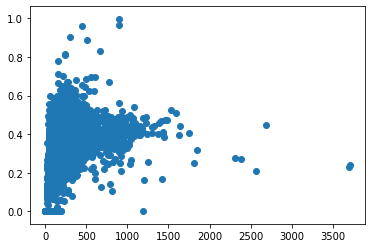

In [208]:
plt.scatter(data.length_abstract, data.rouge_1)

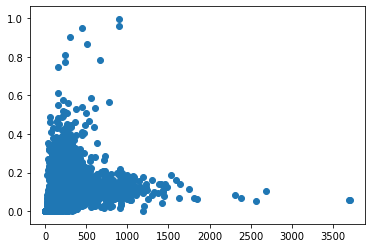

In [209]:
plt.scatter(data.length_abstract, data.rouge_2)

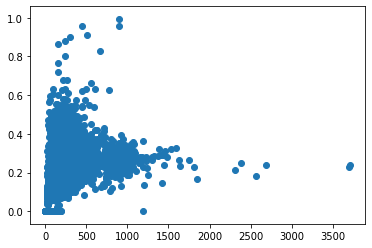

In [210]:
plt.scatter(data.length_abstract, data.rouge_l)